In [20]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data_dir = "D://LAB//master_thesis//result//4_4//PCB//"
table=pd.read_csv(data_dir+'psnr_result.csv')

In [25]:
table.drop([200],inplace=True)

In [26]:
new_table=table['edsr']-table['bicubic']

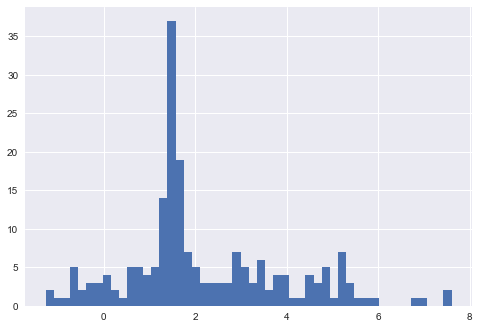

In [27]:
plt.hist(new_table,bins=50)
plt.show()

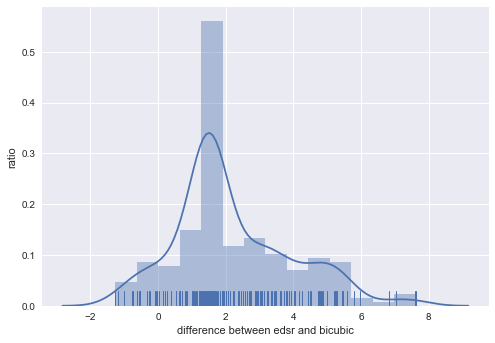

In [42]:
image=sns.distplot(new_table,rug=True)
plt.xlabel("difference between edsr and bicubic")
plt.ylabel("ratio")
fig=image.get_figure()
plt.show()

In [43]:
fig.savefig("hist.png")